<h1 align=center>Capítulo 3 - Recursos linguísticos</h1>
<p align=center><img src=https://www.programaria.org/wp-content/uploads/2020/04/914.png width=500></p>

Este capítulo é um mergulho profundo em todo o poder do spaCy. Você descobrirá os recursos linguísticos, incluindo os recursos mais usados do spaCy, como o **tagger de parte da fala (POS)**, o **analisador de dependência**, o **reconhecedor de entidade nomeado** e os **recursos de mesclagem/divisão**.

Primeiro, você aprenderá o conceito de **tag POS**, como funciona o tagger spaCy POS e como colocar tags POS em seus aplicativos de **compreensão de linguagem natural (NLU)**. A seguir, você aprenderá uma maneira estruturada de representar a sintaxe da frase por meio do analisador de dependência. Você aprenderá sobre os rótulos de dependência do spaCy e como interpretar os resultados do rotulador de dependência spaCy com exemplos reveladores. Em seguida, você aprenderá um conceito NLU muito importante que está no centro de muitos aplicativos de **processamento de linguagem natural (NLP)** — chamado de **reconhecimento de entidade (NER)**. Veremos exemplos de como extrair informações do texto usando NER. Por fim, você aprenderá a mesclar/dividir as entidades extraídas.

Neste capítulo, abordaremos os seguintes tópicos principais:
* O que é marcação POS?
* Introdução à análise de dependência
* Apresentando o NER
* Mesclando e dividindo tokens

## O que é marcação POS?

Vimos os termos *tag PO*S e *tagging POS* brevemente no capítulo anterior, enquanto discutimos os recursos da classe spaCy **Token**. Como é óbvio pelo nome, eles se referem ao processo de marcação de tokens com tags POS. Uma pergunta permanece aqui: *O que é uma tag POS?* Nesta seção, descobriremos em detalhes o conceito de *POS* e como aproveitá-lo ao máximo em nossos aplicativos de NLP.

O acrônimo de marcação de **POS tagging** se expande como marcação de **parte da fala**. Uma **parte do discurso** é uma categoria sintática na qual cada palavra se enquadra em uma categoria de acordo com sua função em uma frase. Por exemplo, o inglês tem nove categorias principais: verbo, substantivo, pronome, determinante, adjetivo, advérbio, preposição, conjunção e interjeição. Podemos descrever as funções de cada categoria da seguinte forma:

* **Verbo**: Expressa uma ação ou um estado de ser
* **Substantivo**: Identifica uma pessoa, um lugar ou uma coisa, ou nomeia um deles em particular (um nome próprio)
* **Pronome**: pode substituir um substantivo ou frase nominal
* **Determinador**: é colocado na frente de um substantivo para expressar uma quantidade ou esclarecer a que o substantivo se refere - resumidamente, um introdutor de substantivo
* **Adjetivo**: Modifica um substantivo ou um pronome
* **Advérbio**: Modifica um verbo, um adjetivo ou outro advérbio
* **Preposição**: conecta um substantivo/pronome a outras partes da frase
* **Conjunção**: Cola palavras, orações e frases juntas
* **Interjeição**: Expressa emoção de forma repentina e exclamativa

Esse conjunto central de categorias, sem nenhuma característica morfológica ou sintática específica do idioma, é chamado de **tags universais**. spaCy captura tags universais por meio do recurso **pos_** e as descreve com exemplos, como segue:

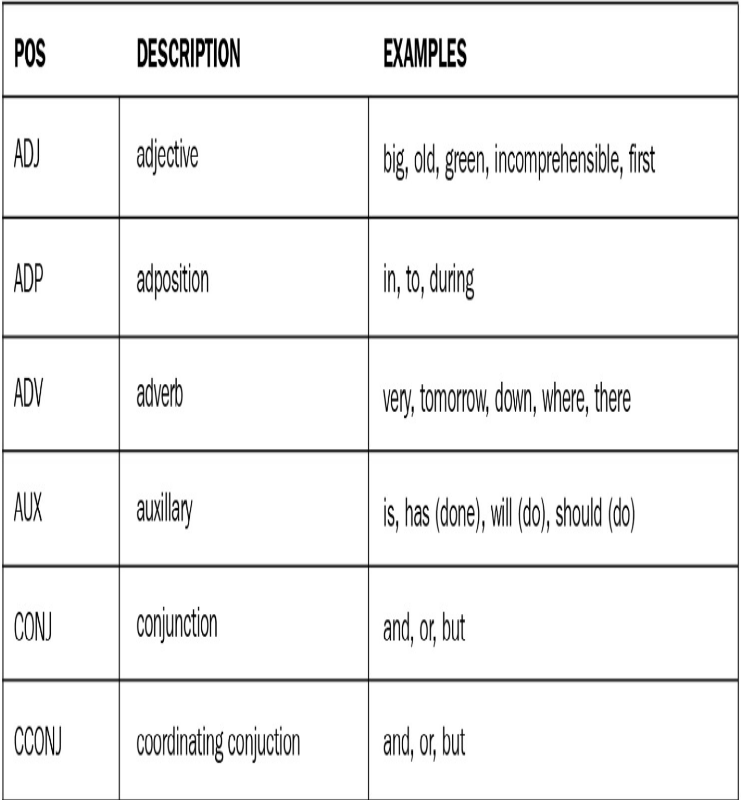

In [9]:
from IPython.display import Image
Image('images/tag_explained.PNG', width=500)

Ao longo do livro, fornecemos exemplos com o idioma inglês e, portanto, nesta seção, nos concentraremos no inglês. Diferentes idiomas oferecem diferentes conjuntos de tags, e spaCy suporta diferentes conjuntos de tags via **tag_map.py** em cada submódulo de idioma. Por exemplo, o conjunto de tags em inglês atual está em **lang/en/tag_map.py** e o conjunto de tags em alemão fica em **lang/de/tag_map.py**. Além disso, o mesmo idioma pode suportar diferentes conjuntos de tags; por esta razão, spaCy e outras bibliotecas de NLP sempre especificam qual conjunto de tags elas usam. O tagger POS spaCy English usa o conjunto de tags **Ontonotes 5** e o tagger POS alemão usa o conjunto de tags **TIGER Treebank**.

Cada idioma suportado do spaCy admite seu próprio conjunto de tags e esquema de tagging refinado, um esquema de tagging específico que geralmente cobre características morfológicas, tempos e aspectos dos verbos, número de substantivos (singular/plural), informações de pessoa e número de pronomes (primeiro-,segunda-, terceira-pessoa do singular/plural), tipo de pronome (pessoal, demonstrativo, interrogativo), tipo de adjetivo (comparativo ou superlativo) e assim por diante.

O spaCy oferece suporte a tags POS de granulação fina para atender às necessidades específicas do idioma, e o recurso **tag_** corresponde às tags de granulação fina. A captura de tela a seguir nos mostra uma parte dessas tags POS refinadas e seus mapeamentos para tags POS mais universais para inglês:

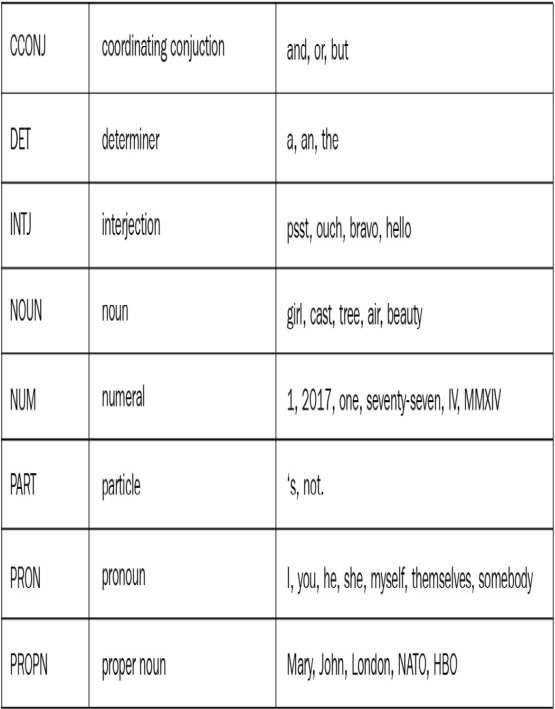

In [11]:
Image('images/english_tags.PNG', width=500)

Não se preocupe se você nunca trabalhou com tags POS antes, pois você se familiarizará praticando com a ajuda de nossos exemplos. Sempre incluiremos explicações das tags que usamos. Você também pode chamar **spacy.explain()** nas tags. Geralmente chamamos **spacy.explain()** de duas maneiras, diretamente na string do nome da tag ou com **token.tag_**, conforme ilustrado no trecho de código a seguir:

In [12]:
import spacy
spacy.explain('NNS')

'noun, plural'

In [15]:
nlp = spacy.load('en_core_web_md')
doc = nlp('I saw flowers.')
token = doc[2]
print('{} - {} - {}'.format(token.text,token.tag_,spacy.explain(token.tag_)))

flowers - NNS - noun, plural


Se você quiser saber mais sobre POS, você pode ler mais sobre ele em dois excelentes recursos: *Part of Speech em http://partofspeech.org/* e *Eight Parts of Speech em http://www.butte.edu/ departamentos/cas/tipsheets/grammar/parts_of_speech.html*.

Como você pode ver, a marcação POS oferece uma compreensão sintática muito básica da frase. As tags POS são usadas extensivamente na NLU; frequentemente queremos encontrar os verbos e os substantivos em uma frase e desambiguar melhor algumas palavras por seus significados (mais sobre este assunto em breve).

Cada palavra é marcada por uma tag POS dependendo de seu contexto - as outras palavras ao redor e suas tags POS. Tags POS são modelos estatísticos sequenciais, o que significa que uma tag de uma palavra depende dos *tokens vizinhos da palavra, suas tags e a própria palavra*. A marcação POS sempre foi feita de diferentes formas. O aprendizado de **sequência a sequência (Seq2seq)** começou com **Hidden Markov Models (HMMs)** nos primeiros dias e evoluiu para modelos de rede neural – normalmente, **variações de memória de longo prazo (LSTM)** (spaCy também usa uma variação LSTM). Você pode testemunhar a evolução da marcação POS de última geração no site da ACL (https://aclweb.org/aclwiki/POS_Tagging_(State_of_the_art)).

É hora de algum código agora. Novamente, spaCy oferece tags POS universais por meio dos recursos **token.pos (int)** e **token.pos_ (unicode)**. As tags POS refinadas estão disponíveis por meio dos recursos **token.tag (int)** e **token.tag_ (unicode)**.

Vamos aprender mais sobre as tags que você mais encontrará, por meio de alguns exemplos. O exemplo a seguir inclui exemplos de tags de substantivo, nome próprio, pronome e verbo:

In [16]:
doc = nlp('Alicia and me went to the school by bus.')
for token in doc:
	print(f"{token.text}  ====  {token.pos_} ==== {token.tag_} ==== {spacy.explain(token.pos_)} ==== {spacy.explain(token.tag_)}")

Alicia  ====  PROPN ==== NNP ==== proper noun ==== noun, proper singular
and  ====  CCONJ ==== CC ==== coordinating conjunction ==== conjunction, coordinating
me  ====  PRON ==== PRP ==== pronoun ==== pronoun, personal
went  ====  VERB ==== VBD ==== verb ==== verb, past tense
to  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
the  ====  DET ==== DT ==== determiner ==== determiner
school  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
by  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
bus  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
.  ====  PUNCT ==== . ==== punctuation ==== punctuation mark, sentence closer


Nós iteramos sobre os tokens e imprimimos o texto dos tokens, a tag universal e a tag refinada, juntamente com as explicações, que são descritas aqui:
* Alicia é um nome próprio, como esperado, e NNP é uma tag para nomes próprios.
* me é um pronome e bus é um substantivo. NN é uma tag para substantivos singulares e
* PRP é uma tag de pronome pessoal.
* As tags verbais começam com V. Aqui, VBD é uma tag para go, que é um verbo no passado.

Agora, considere a seguinte frase:

In [17]:
doc = nlp("My friend will fly to New York fast and she is staying there for 3 days.")
for token in doc:
    print(f"{token.text}  ====  {token.pos_} ==== {token.tag_} ==== {spacy.explain(token.pos_)} ==== {spacy.explain(token.tag_)}")

My  ====  PRON ==== PRP$ ==== pronoun ==== pronoun, possessive
friend  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
will  ====  AUX ==== MD ==== auxiliary ==== verb, modal auxiliary
fly  ====  VERB ==== VB ==== verb ==== verb, base form
to  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
New  ====  PROPN ==== NNP ==== proper noun ==== noun, proper singular
York  ====  PROPN ==== NNP ==== proper noun ==== noun, proper singular
fast  ====  ADV ==== RB ==== adverb ==== adverb
and  ====  CCONJ ==== CC ==== coordinating conjunction ==== conjunction, coordinating
she  ====  PRON ==== PRP ==== pronoun ==== pronoun, personal
is  ====  AUX ==== VBZ ==== auxiliary ==== verb, 3rd person singular present
staying  ====  VERB ==== VBG ==== verb ==== verb, gerund or present participle
there  ====  ADV ==== RB ==== adverb ==== adverb
for  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
3  ====  NUM ==== CD ==== numeral ==== 

Vamos começar com os verbos. Como apontamos no primeiro exemplo, as tags verbais começam com V. Aqui, existem três verbos, como segue:
* fly: a base form
* staying: an -ing form
* is: an auxiliary verb

As tags correspondentes são **VB**, **VBG** e **VBZ**.

Outro detalhe é que tanto **New** quanto **York** são marcados como nomes próprios. Se um nome próprio consiste em vários tokens, todos os tokens admitem a tag **NNP**. **My** é um pronome possessivo e é marcado como **PRP$**, em contraste com o pronome pessoal anterior **me** e sua **tag PRP**.

Vamos continuar com uma palavra que pode ser um verbo ou um substantivo, dependendo do contexto: **ship**. Na frase a seguir, **ship** é usado como um verbo:

In [18]:
doc = nlp("I will ship the package tomorrow.")
for token in doc:
    print(f"{token.text}  ====  {token.pos_} ==== {token.tag_} ==== {spacy.explain(token.pos_)} ==== {spacy.explain(token.tag_)}")

I  ====  PRON ==== PRP ==== pronoun ==== pronoun, personal
will  ====  AUX ==== MD ==== auxiliary ==== verb, modal auxiliary
ship  ====  VERB ==== VB ==== verb ==== verb, base form
the  ====  DET ==== DT ==== determiner ==== determiner
package  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
tomorrow  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
.  ====  PUNCT ==== . ==== punctuation ==== punctuation mark, sentence closer


Aqui, **ship** é marcado como um verbo, como esperávamos. Nossa próxima frase também contém a palavra **ship**, mas como um substantivo. Agora, o tagger spaCy pode marcá-lo corretamente? Dê uma olhada no trecho de código a seguir para descobrir:

In [19]:
doc = nlp("I saw a red ship.")
for token in doc:
    print(f"{token.text}  ====  {token.pos_} ==== {token.tag_} ==== {spacy.explain(token.pos_)} ==== {spacy.explain(token.tag_)}")

I  ====  PRON ==== PRP ==== pronoun ==== pronoun, personal
saw  ====  VERB ==== VBD ==== verb ==== verb, past tense
a  ====  DET ==== DT ==== determiner ==== determiner
red  ====  ADJ ==== JJ ==== adjective ==== adjective (English), other noun-modifier (Chinese)
ship  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
.  ====  PUNCT ==== . ==== punctuation ==== punctuation mark, sentence closer


E voilà! Desta vez, a palavra **ship** agora está marcada como um substantivo, como queríamos ver. O *tagger* olhou para as palavras ao redor; aqui, **ship** é usado com um determinante e um adjetivo, e spaCy deduziu que deveria ser um substantivo.

Que tal esta frase complicada:

In [20]:
doc = nlp("My cat will fish for a fish tomorrow in a fishy way.")
for token in doc:
    print(f"{token.text}  ====  {token.pos_} ==== {token.tag_} ==== {spacy.explain(token.pos_)} ==== {spacy.explain(token.tag_)}")

My  ====  PRON ==== PRP$ ==== pronoun ==== pronoun, possessive
cat  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
will  ====  AUX ==== MD ==== auxiliary ==== verb, modal auxiliary
fish  ====  VERB ==== VB ==== verb ==== verb, base form
for  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
a  ====  DET ==== DT ==== determiner ==== determiner
fish  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
tomorrow  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
in  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
a  ====  DET ==== DT ==== determiner ==== determiner
fishy  ====  ADJ ==== JJ ==== adjective ==== adjective (English), other noun-modifier (Chinese)
way  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
.  ====  PUNCT ==== . ==== punctuation ==== punctuation mark, sentence closer


Queríamos enganar o tagger com os diferentes usos da palavra **fish**, mas o tagger é inteligente o suficiente para distinguir o verbo **fish**, o substantivo **fish** e o adjetivo **fishy**. Aqui está como ele fez isso:
* Em primeiro lugar, **fish** vem logo após o verbo modal **will**, então o tagger o reconheceu como um verbo.
* Em segundo lugar, **fish** serve como objeto da sentença e é qualificado por um determinante; a tag é provavelmente um substantivo.
* Finalmente, **fishy** termina em **y** e vem antes de um substantivo na frase, então é claramente um adjetivo.

O tagger spaCy fez um trabalho muito tranquilo aqui ao prever uma frase complicada. Após exemplos de marcação muito precisa, apenas uma pergunta fica em nossas mentes: *Por que precisamos das tags POS?*

Qual é a importância das tags POS no NLU e por que precisamos distinguir a classe das palavras de qualquer maneira? A resposta é simples: muitos aplicativos precisam saber o tipo de palavra para melhor precisão. Considere os sistemas de tradução automática para um exemplo disso: as palavras para fish (V) e fish (N) correspondem a palavras diferentes em espanhol, conforme ilustrado no seguinte trecho de código:
~~~python
I will fish/VB tomorrow. -> Pescaré/V mañana.
I eat fish/NN. -> Como pescado/N.
~~~
As informações sintáticas podem ser usadas em muitas tarefas NLU, e alguns truques de POS podem ajudar muito seu código NLU. Vamos continuar com um problema tradicional:  **word-sense disambiguation** (desambiguação de sentido de palavras) (WSD), e como resolvê-lo com a ajuda do spaCy tagger.

### WSD
WSD é um problema clássico de NLU de decidir em que sentido uma palavra em particular é usada em uma frase. Uma palavra pode ter muitos sentidos – por exemplo, considere a palavra *Bass*. Aqui estão alguns sentidos que podemos pensar:
* Bass — robalo, peixe (noun (N))
* Bass — voz masculina mais baixa (N)
* Bass — cantor masculino com extensão de voz mais baixa (N)

Determinar o sentido da palavra pode ser crucial em mecanismos de busca, tradução automática e sistemas de resposta a perguntas. Para o exemplo anterior, *bass*, um tagger POS infelizmente não ajuda muito, pois o tagger rotula todos os sentidos com uma tag de substantivo. Precisamos de mais do que um tagger POS. Que tal a palavra *beat*? Vamos dar uma olhada nisso aqui:
* Beat – bater violentamente (verbo (V))
* Beat — para derrotar alguém em um jogo ou competição (V)
* Beat — ritmo na música ou poesia (N)
* Beat — movimento de asa de pássaro (N)
* Beat — completamente exausto (adjetivo (ADJ))

Aqui, a marcação POS pode ajudar muito. A tag **ADJ** determina definitivamente o sentido da palavra; se a palavra *beat* estiver marcada como **ADJ**, identifica o sentido completamente esgotado. Isso não é verdade para as tags **V** e **N** aqui; se a palavra *beat* for rotulada com uma etiqueta **V**, seu sentido pode ser *atacar violentamente ou derrotar outra pessoa*. WSD é um problema aberto, e muitos modelos estatísticos complicados são propostos. No entanto, se você precisar de um protótipo rápido, poderá resolver esse problema em alguns casos (como no exemplo anterior) com a ajuda do spaCy tagger.

### Tempo verbal e aspecto em aplicações NLU

No capítulo anterior, usamos o exemplo do aplicativo de agência de viagens onde obtivemos as formas base (que são livres de tempo verbal e aspecto) dos verbos usando lematização. Nesta subseção, vamos nos concentrar em como usar o tempo verbal e as informações de aspecto que perdemos durante o processo de lematização.

**Tempo verbal** e **aspecto** são talvez as informações mais interessantes que os verbos nos fornecem, nos dizendo quando a ação aconteceu no tempo e se a ação do verbo está terminada ou em andamento. Tempo e aspecto juntos indicam a referência de um verbo ao tempo atual. O inglês tem três tempos básicos: passado, presente e futuro. Um tempo verbal é acompanhado por aspectos simples, progressivos/contínuos ou perfeitos. Por exemplo, na frase *I'm eating*, a ação comer acontece no presente e está em andamento, portanto, descreve este verbo como presente progressivo/contínuo. Até agora tudo bem. Então, como usamos essas informações em nossa agência de viagens NLU? Considere as seguintes frases de clientes que podem ser direcionadas ao nosso aplicativo NLU:
~~~python
I flew to Rome.
I have flown to Rome.
I'm flying to Rome.
I need to fly to Rome.
I will fly to Rome.
~~~

Em todas as frases, a ação é *to fly*: no entanto, apenas algumas frases afirmam a intenção de fazer uma reserva de passagem. Vamos imaginar essas frases com um contexto circundante, como segue:
~~~python
I flew to Rome 3 days ago. I still didn't get the bill, please send it ASAP.
I have flown to Rome this morning and forgot my laptop on the airplane. Can you please connect me to lost and found?
I'm flying to Rome next week. Can you check flight availability?
I need to fly to Rome. Can you check flights on next Tuesday?
I will fly to Rome next week. Can you check the flights?
~~~

De relance, as formas passadas e perfeitas do verbo *fly* não indicam uma intenção de reserva. Em vez disso, eles direcionam para uma reclamação do cliente ou problemas de atendimento ao cliente. As formas progressivas infinitivo e presente, por outro lado, apontam para a intenção de reserva. Vamos marcar e lematizar os verbos com o seguinte segmento de código:

In [22]:
sent1 = "I flew to Rome."
sent2 = "I'm flying to Rome."
sent3 = "I will fly to Rome."

doc1 = nlp(sent1)
doc2 = nlp(sent2)
doc3 = nlp(sent3)

for doc in [doc1, doc2, doc3]:
    print([(w.text, w.lemma_) for w in doc if w.tag_== 'VBG' or w.tag_== 'VB'])


[]
[('flying', 'fly')]
[('fly', 'fly')]


Nós iteramos três objetos **doc** um por um, e para cada sentença verificamos se a tag refinada do token é **VBG** (um verbo na forma progressiva presente) ou **VB** (um verbo na forma base/infinitivo). Basicamente, filtramos os verbos progressivos e infinitivos presentes. Você pode pensar nesse processo como uma representação semântica do verbo na forma de [**word form** (forma de palavra), **lemma**, **tag**], conforme ilustrado no trecho de código a seguir:
~~~python
flying: (fly, VBG)
~~~

Cobrimos uma tarefa semântica e uma morfológica - WSD e tempo/aspecto dos verbos. Continuaremos com um assunto complicado: como tirar o melhor proveito de algumas tags especiais, ou seja, tags de número, símbolo e pontuação.

### Noções básicas sobre tags de número, símbolo e pontuação

Se você observar o POS em inglês, notará as tags **NUM**, **SYM** e **PUNCT**. Essas são as tags para números, símbolos e pontuação, respectivamente. Essas categorias são divididas em categorias refinadas: **$**, **SYM**, **''**, **-LRB-** e **-RRB-**. Eles são mostrados na captura de tela a seguir:

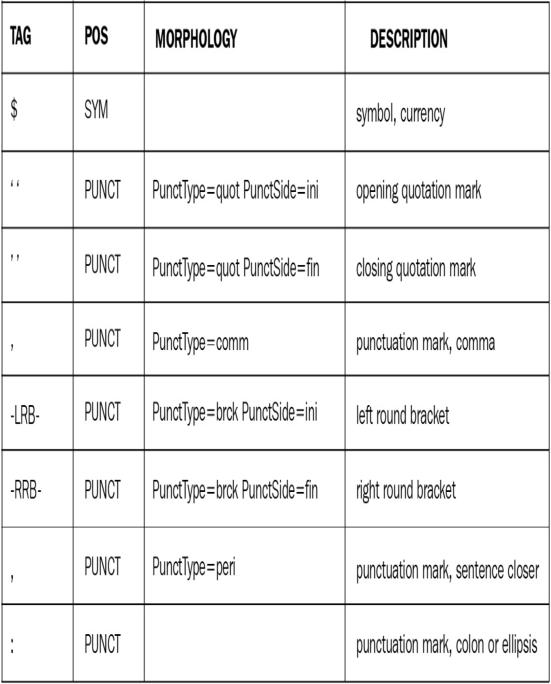

In [24]:
Image('images/tag_punctuation.PNG')

Vamos marcar algumas frases de exemplo que contêm números e símbolos, como segue:

In [25]:
doc = nlp("He earned $5.5 million in 2020 and paid %35 tax.")
for token in doc:
    print(f"{token.text}  ==== {token.tag_}  ==== {spacy.explain(token.tag_)}")

He  ==== PRP  ==== pronoun, personal
earned  ==== VBD  ==== verb, past tense
$  ==== $  ==== symbol, currency
5.5  ==== CD  ==== cardinal number
million  ==== CD  ==== cardinal number
in  ==== IN  ==== conjunction, subordinating or preposition
2020  ==== CD  ==== cardinal number
and  ==== CC  ==== conjunction, coordinating
paid  ==== VBD  ==== verb, past tense
%  ==== NN  ==== noun, singular or mass
35  ==== CD  ==== cardinal number
tax  ==== NN  ==== noun, singular or mass
.  ==== .  ==== punctuation mark, sentence closer


Novamente iteramos sobre os tokens e imprimimos as tags refinadas. O tagger foi capaz de distinguir símbolos, sinais de pontuação e números. Até a palavra **million** também é reconhecida como um número!

Agora, o que fazer com as tags de símbolo? Símbolos e números de moeda oferecem uma maneira de extrair sistematicamente descrições de dinheiro e são muito úteis em textos financeiros, como relatórios financeiros.